# Полезные материалы

https://vk.com/@hsotalks-chto-poschitaesh-to-i-pozhnesh-parametricheskie-i-neparametr


# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import statsmodels.api as sm




np.random.seed(123)

In [65]:
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 150)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.max_colwidth', 888)

# https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()
sns.set(rc = {'figure.figsize':(16, 6)})
sns.set_style("ticks")
sns.set_palette('pastel')
plt.rcParams["figure.figsize"] = (16, 6)

plt.rcParams['grid.linestyle'] = ''

# Нормальное распределение

Нормальное распределение - унимодальное (имеющее одну моду) и симметричное распределение, в котором отклонение от средних подчиняется определенному закону:
* 68.2% наблюдений расположены в диапазоне +-1сигма
* 95.4% наблюдений находятся в диапазоне +-2 сигмы и тд

In [2]:
mu = 0
sigma = 1
norms = np.random.normal(loc=mu, scale=sigma, size=10000)

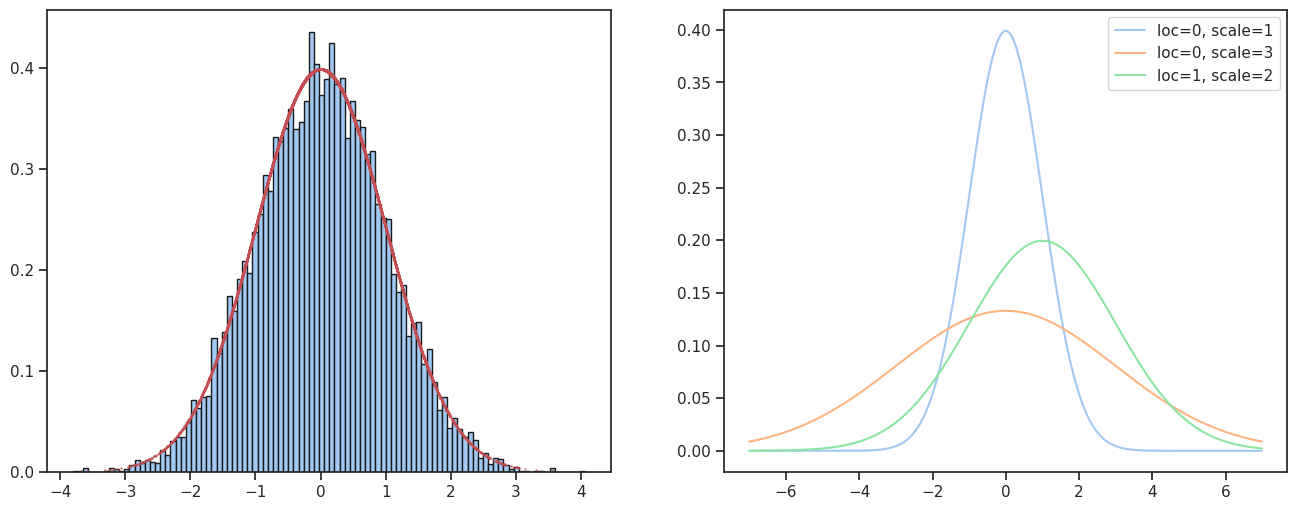

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.hist(norms, bins=100, density=True, ec='k');
ax1.grid(False)
ax1.plot(norms, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (norms - mu)**2 / (2 * sigma**2) ), '.r', markersize=1);

x = np.arange(-7, 7, 0.01)
ax2.plot(x, st.norm.pdf(x, loc=0, scale=1), label='loc=0, scale=1');
ax2.plot(x, st.norm.pdf(x, loc=0, scale=3), label='loc=0, scale=3');
ax2.plot(x, st.norm.pdf(x, loc=1, scale=2), label='loc=1, scale=2');
ax2.legend();
ax2.grid(False)

# Z-стандартизация

По умолчанию любое распределение, как правило, смещено относительно нуля и имеет стандартное отклонение, отличное от 1. Но для исследований бывает полезно отмасштабировать данные так, чтобы среднее и станартное отклонение стали равны 0 и 1 соответственно. Такое преобразование называется z-стандартизацией. Оно выполняется по следующей формуле

$$ \large z _i = \frac{x _i - \mu}{\sigma}   $$

Для распределения нужно рассчитать среднее и стандартное отклонение, а затем из каждого числа вычесть среднее и поделить эту разницу на стандартное отклонение

In [4]:
dist = np.random.uniform(-2, 15, 1000)
mu = np.mean(dist)
sigma = np.std(dist)

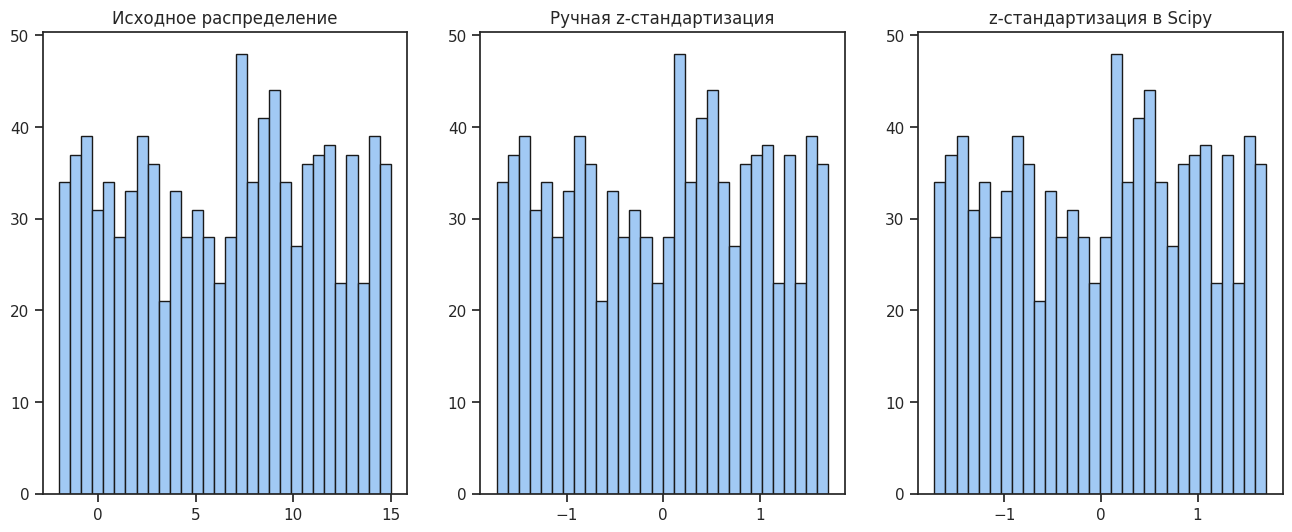

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

ax1.set_title('Исходное распределение')
ax1.hist(dist, bins=30, ec='k');
ax1.grid(False)

ax2.set_title('Ручная z-стандартизация')
ax2.hist([(item-mu)/sigma for item in dist], bins=30, ec='k')
ax2.grid(False);

ax3.set_title('z-стандартизация в Scipy')
ax3.hist(st.zscore(dist), bins=30, ec='k')
ax3.grid(False);

**Вывод**

Стандартное отклонение не меняет форму распределения, но приводит срднее к нулю и стандартное отклонение к единице

Прикладной смысл z-стандартизации применительно к нормально распределенным величинам такой: зная параметры распределения, мы можем оценить, какой процент наблюдений не превышает определенную величину.

Пример:
Пусть дано распределение (и известно, что оно **нормальное**) роста людей heights. Нужно оценить вероятность встретить человека с ростом более 190 см

In [6]:
q = 195
mu = 170
sigma = 15
heights = np.random.normal(loc=mu, scale=sigma, size=1000)
height_prob = st.norm.pdf(sorted(heights), loc=np.mean(heights), scale=np.std(heights))

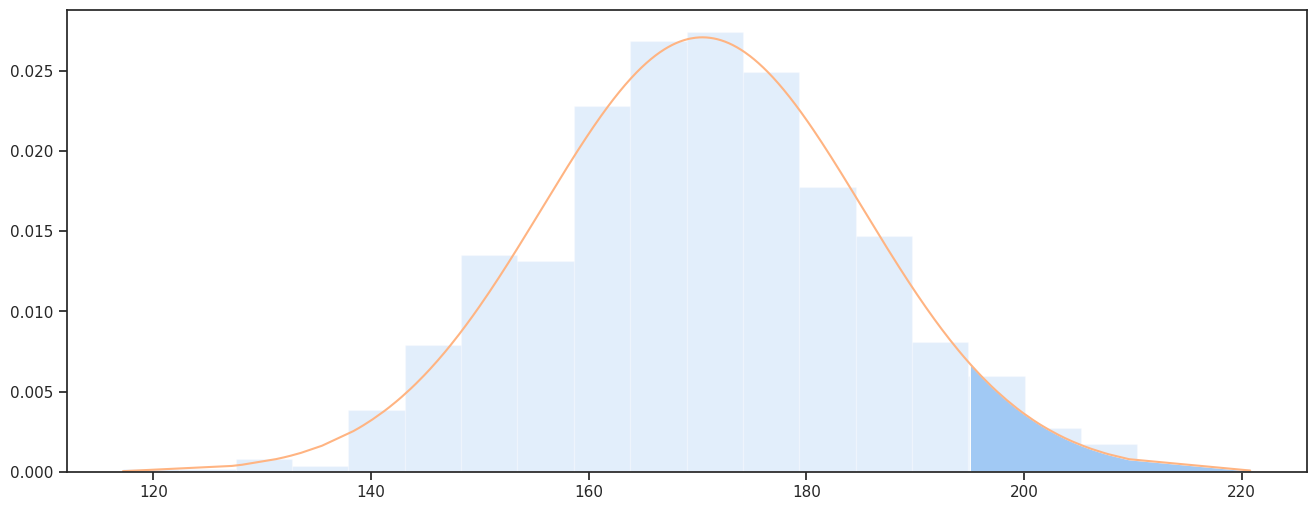

In [7]:
fig, ax1 = plt.subplots(1, 1)
ax1.hist(heights, bins=20, density=True, ec='w', alpha=0.3);
ax1.plot(sorted(heights), height_prob);
ax2 = plt.fill_between(np.sort(heights), 0, height_prob, where=np.sort(heights)>q)

Переведем искомую границу в z-шкалу и найдем площадь закрашенного участка под кривой

In [8]:
print(f'Рост {q} отклоняется от среднего на {(q-mu) / sigma:.2f} стандартных отклонений')
print(f'Вероятность встретить человека выше {q} см составляет {1-st.norm.cdf((q-mu) / sigma):.2%}')

Рост 195 отклоняется от среднего на 1.67 стандартных отклонений
Вероятность встретить человека выше 195 см составляет 4.78%


Аналогично можно решать задачи определения двусторонней вероятности (выше 195 см, но ниже 150) или наоборот (от 150 до 195)

# Центральная предельная теорема

Имеем генеральную совокупность, распределенную **как угодно**. Посмотрим на его среднее и стандартное отклонение

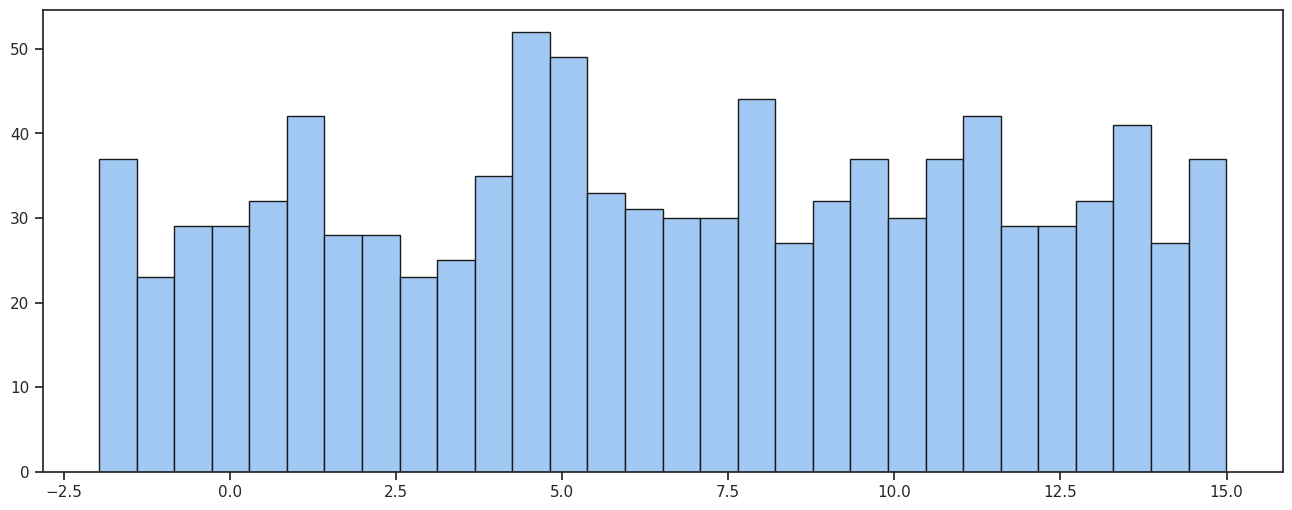

In [9]:
dist = np.random.uniform(-2, 15, 1000)
plt.hist(dist, bins=30, ec='k');

In [10]:
print(f'Среднее {np.mean(dist):.2f}, Стандартное отклонение: {np.std(dist):.2f}')

Среднее 6.67, Стандартное отклонение: 4.83


Начнем извлекать выборки достаточно большого размера (больше 30) и фиксировать их среднее и стандартное отклонение

In [11]:
means = []
for i in range(1000):
    sample = np.random.choice(dist, size=50)
    if i<5:
        print(f'Среднее {np.mean(sample):.2f}, Стандартное отклонение: {np.std(sample):.2f}')
    means.append(np.mean(sample))

Среднее 6.37, Стандартное отклонение: 4.78
Среднее 7.08, Стандартное отклонение: 4.97
Среднее 6.11, Стандартное отклонение: 4.70
Среднее 6.34, Стандартное отклонение: 4.40
Среднее 6.36, Стандартное отклонение: 4.76


Средние и стандартные отклонения похожи на параметры "генеральной совокупности". Посмотрим на гистограмму распределения средних, а также нанесем на нее среднее генеральной совокупности

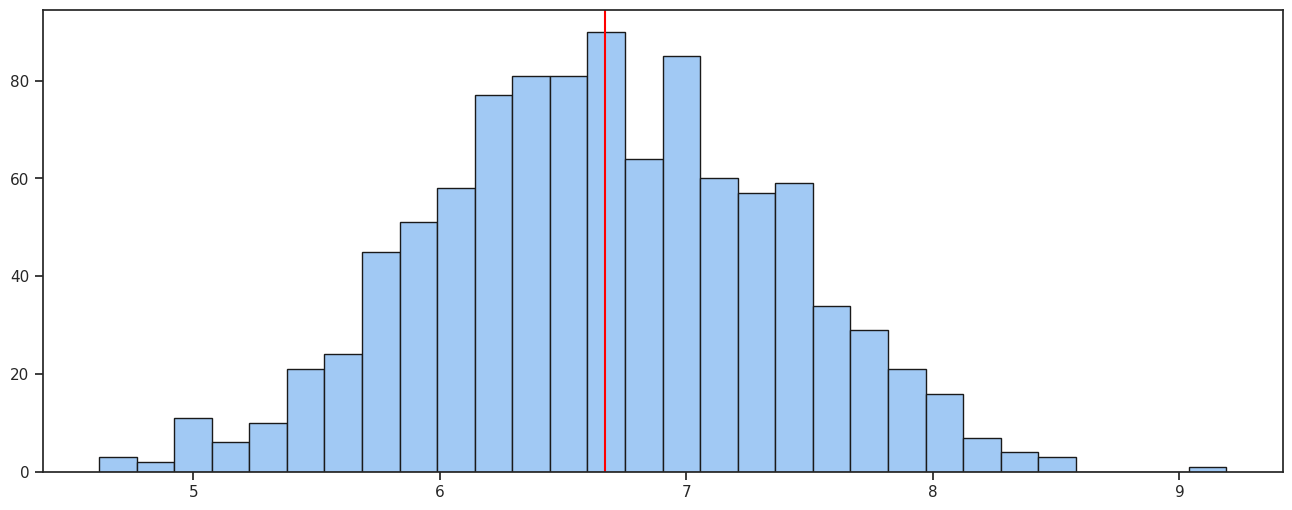

In [12]:
plt.hist(means, bins=30, ec='k');
# plt.plot(np.random.normal(loc=np.mean(dist), scale=np.std(dist), size=1000))
plt.axvline(np.mean(dist), color='red');

Это и есть центральная предельная теорема: если из любой генеральной совокупности извлекать выборки достаточно большого объема, то их средние распределятся нормально вокруг среднего генеральной совокупности. Стандартное отклонение этого распределения называют стандартной ошибкой SE и вычисляют по формуле

$$ \large SE=\frac{\sigma}{\sqrt{n}}    $$

где σ - стандартное отклонение генеральной совокупности. n - число наблюдений в каждой выборке. Тут важно оговориться, что, строго говоря, стандартного отклонения генеральной совокупности у нас нет, но в данном случае при условии большого количества наблюдений этим можно пренебречь и использовать стандартное отклонение выборок (они близки). А в дальнейших темах это допущение будет разрешено.

Теперь выведем одно очень важное следствие ЦПТ

1. Нанесем на график несколько "предполагаемых" распределений среднего ГС, построенных по параметрам выборок (черные кривые на рис. 1)
2. Добавим к графику реальное распределение полученных выборочных средних (красная кривая), будем называть его метараспределение. а также истинное среднее генеральной совокупности (синяя вертикальная линия)
3. Что видно из графиков:
* Среднее метараспределения совпадает со средним генеральной совокупности
* Все распределения на графике имеют ~одинаковое стандартное отклонение
4. Оставим на графике (рис. 2) только метараспределение и распределение, построенное по нашему предположению о среднем, назовем его для краткости просто распределение. Помним, что среднее генеральной совокупности находится в среднем метараспределения.
5. Так как распределения эквивалентные, то можно сформулировать две эквивалентные задачи
* Определить вероятность встретить среднее распределения в метараспределении
* Определить вероятность встретить среднее метараспределения в распределении

Последний пункт и является очень важным практическим следствием ЦПТ. Согласно нему, достаточно из ГС извлечь одну выборку и по ней с определенной вероятностью узнать среднее генеральной совокупности.

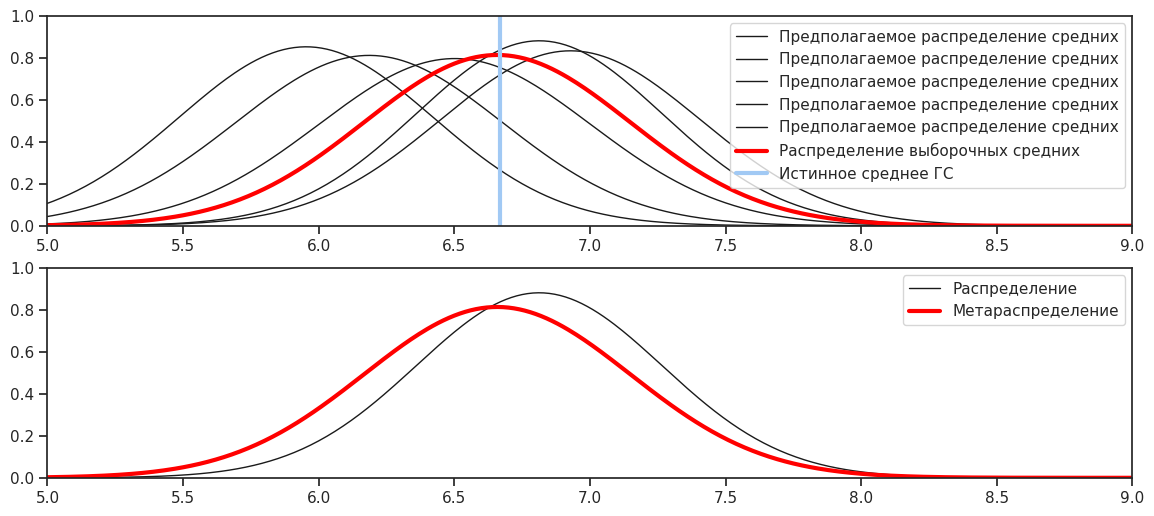

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6))

x = np.arange(-2, 15, 0.01)
means = []
for i in range(999):
    n = 100
    sample = np.random.choice(dist, size=n)
    means.append(np.mean(sample))
    if i>993:
        ax1.plot(x, st.norm.pdf(x, loc=np.mean(sample),
                                   scale=np.std(sample)/np.sqrt(n)), color='k', linewidth=1, label='Предполагаемое распределение средних');

ax1.plot(x, st.norm.pdf(x, loc=np.mean(means), scale=np.std(means)), color='red', linewidth=3, label='Распределение выборочных средних');
ax1.axvline(np.mean(dist), linewidth=3, label='Истинное среднее ГС')

ax1.set_xlim([5, 9]);
ax1.set_ylim([0, 1]);
ax1.legend();

ax2.plot(x, st.norm.pdf(x,
                        loc=means[-1],
                        scale=np.std(sample)/np.sqrt(n)), color='k', linewidth=1, label='Распределение');
ax2.plot(x, st.norm.pdf(x, loc=np.mean(means), scale=np.std(means)), color='red', linewidth=3, label='Метараспределение');
ax2.set_xlim([5, 9]);
ax2.set_ylim([0, 1]);
ax2.legend();
ax2.legend();

# Доверительный интервал

Пользуясь выведенным следствием из ЦПТ, можно строить доверительные интервалы для истинного среднего генеральной совокупности

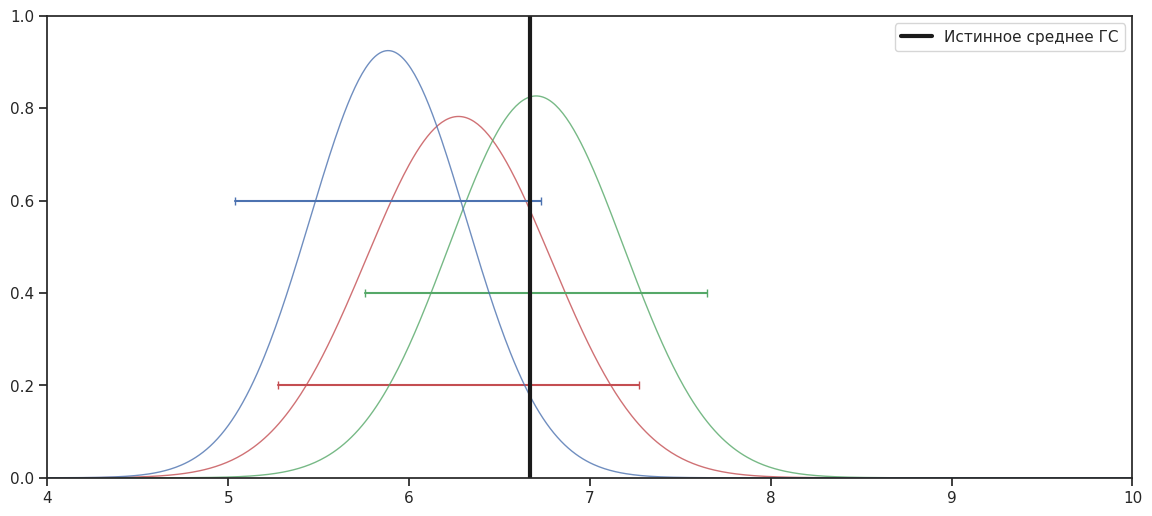

In [14]:
fig, ax1 = plt.subplots(1, 1, figsize=(14, 6))
conf = 0.95

x = np.arange(-2, 15, 0.01)

for i, c, height in zip(range(3), ('r', 'g', 'b'), (0.2, 0.4, 0.6)):
    n = 100
    sample = np.random.choice(dist, size=n)

    ax1.plot(x, st.norm.pdf(x, loc=np.mean(sample),
                               scale=np.std(sample)/np.sqrt(n)), color=c, alpha=0.8, linewidth=1);
    min, max = st.norm.interval(conf, loc=np.mean(sample), scale=np.std(sample)/np.sqrt(n))
    ax1.plot((min, max), (height, height), '|-', color=c)


ax1.axvline(np.mean(dist), linewidth=3, label='Истинное среднее ГС', color='k')

ax1.set_xlim([4, 10]);
ax1.set_ylim([0, 1]);
ax1.legend();

Выражение "95% доверительный интервал" означает, что 95% выборочных средних будут находиться в найденном интервале. Как  ищется этот интервал:
* Для имеющейся выборки ищется такое z-значение, чтобы в интервале ±z*σ находилось 95% всех выборочных средних
* От среднего выборки откладывается z*σ вправо и влево. Это и есть доверительный интервал
* Разумеется, можно строить и другие доверительные интервалы. Например, 99% доверительный интервал будет шире, чем 95%-ый, и на каждые сто выборок будет попадаться всего одна, чье среднее в этот интервал попадать не будет

# Идея статистического вывода, p-уровень значимости

Задача оценки среднего генеральной совокупности встречается редко. Гораздо чаще приходится отвечать на вопрос о наличии различий между двумя выборками (например некоторыми характеристиками двух контрольных групп).

Допустим, срок выздоровления пациента от некоторого заболевания M<sup>0</sup> составляет 20 дней. Мы сварили препарат, который на контрольной группе из 64 человек показал следующие результаты:
Средний срок выздоровления снизился до M<sup>1</sup>=18.5 дней со среднеквадратичным отклонением sd, равным 4

С одной стороны, срок выздоровления правда уменьшился. С другой, такой средний срок мог быть получен случайно.

Введем понятие нулевой и альтернативной гипотезы.

* Нулевая гипотеза H<sup>0</sup> гласит, что различий между выборками нет, и их средние равны: M<sup>0</sup> = M<sup>1</sup>
* Альтернативная гипотеза H<sup>1</sup>: различия есть, то есть M<sup>0</sup> ≠ M<sup>1</sup>


Если следовать нулевой гипотезе, то, согласно ЦПТ, выборочные средние должны распределиться нормально вокруг среднего ГС (20) со среднеквадратичной ошибкой SE=sd/sqrt(n). Задача сводится к тому, что понять, насколько далеко отклонилось выборочное среднее от среднего ГС в единицах стандартного отклонения.

In [15]:
z = (18.5-20) / (4/64**0.5)
z

-3.0

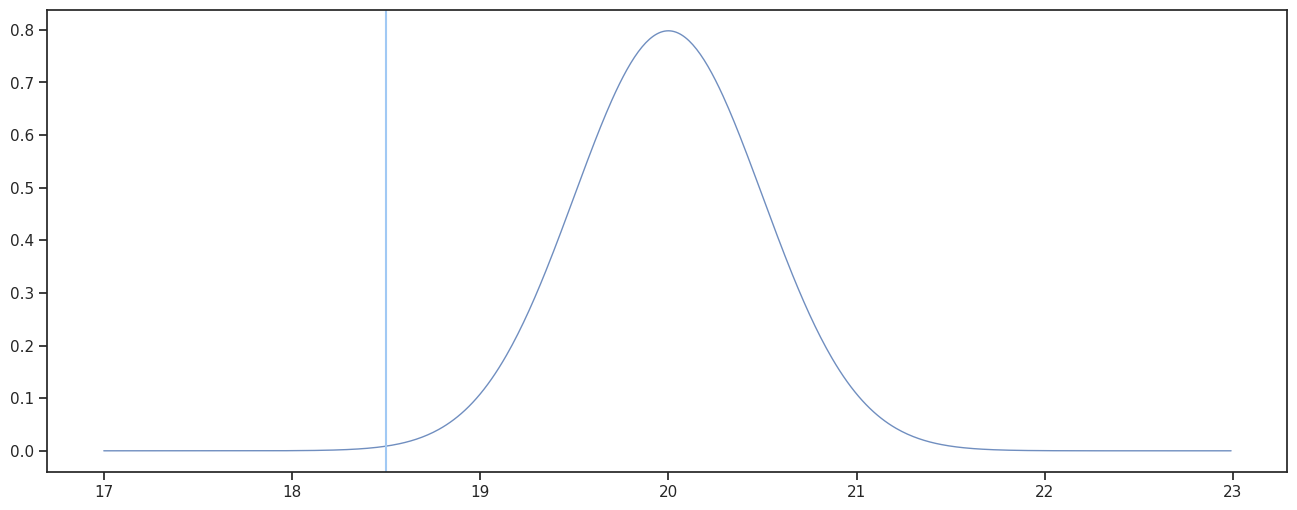

In [16]:
x = np.arange(17, 23, 0.01)
plt.plot(x, st.norm.pdf(x, loc=20, scale=4/64**0.5), color=c, alpha=0.8, linewidth=1);
plt.axvline(18.5);

Полученный результат означает, что если среднее ГС равняется 20, то наше выборочное среднее отклонилось на 3 стандартных отклонения влево, что является достаточно уникальным и видимо неслучайным событием.

Посмотрим на p-value такого события. Мы хотим

In [17]:
q = -3
days = np.random.normal(loc=0, scale=1, size=100000)
days_prob = st.norm.pdf(sorted(days), loc=np.mean(days), scale=np.std(days))

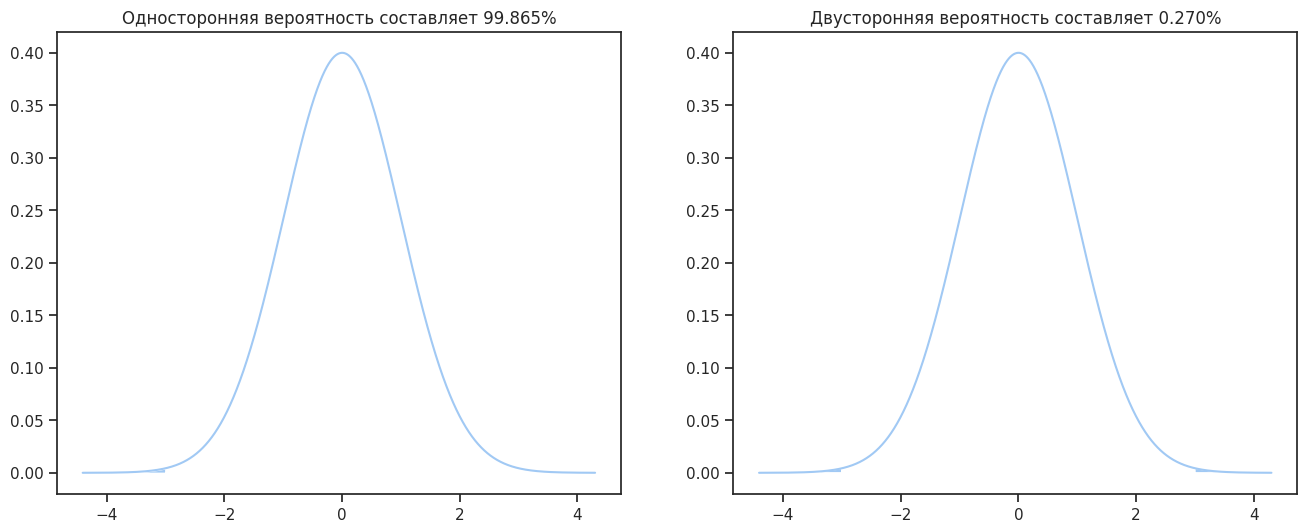

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(sorted(days), days_prob);
ax1.fill_between(np.sort(days), 0, days_prob, where=np.sort(days)<q);
ax1.set_title(f'Односторонняя вероятность составляет {1-st.norm.cdf(q):.3%}');

ax2.plot(sorted(days), days_prob);
ax2.fill_between(np.sort(days), 0, days_prob, where=abs(np.sort(days))>abs(q));
ax2.set_title(f'Двусторонняя вероятность составляет {2*(st.norm.cdf(q)):.3%}');

Зачем использовать двусторонний тест, когда нам нужно определить вероятность уменьшения срока выздоровления - вопрос философский. Вот [здесь](https://stepik.org/lesson/8078/step/7?unit=1358) говорится, что так принято, а односторонний тест используют там, где принципиально невозможно получить отклонение в большую сторону

Жонглирование понятиями вокруг p-уровня значимости может легко ввести в заблуждение. Интуитивно может показаться, что p-value означает вероятность верности нулевой гипотезы. Но это не так.

Правильная формулировка звучит примерно так: p-value показывает вероятность получить такие или еще более выраженные отклонения при условии, что верна нулевая гипотеза

Поэтому не принято после получения p-value говорить, что нулевая гипотеза верна. Обычно говорят о принятии нулевой гипотезы или о ее отклонении.

Еще с нулевой гипотезой связаны такие понятия, как ошибка первого и второго рода
Ошибка первого рода - гипотезу отклонили, а она была верна (False Positive)
Ошибка второго рода - гипотезу приняли, а она была неверна (False Negative)

Так с чем же сравнивать p-value? Опорное значение обозначают альфой. Общепринятые значения для нее: 0.05 и 0.01. Однако никто не запрещает брать другие. Например, когда отклонение нулевой гипотезы слишком рискованно (цена ошибки первого рода велика. Пример: осуждение кого-нибудь на смертную казнь), можно взять альфа=0.0001.

# T-распределение

Как уже было отмечено раньше, центральная предельная теорема работает хорошо, когда у нас выборки достаточно большого объема (>30). В этом случае стандартное отклонение выборок схоже со стандартным отклонением ГС (вспомним, что эта величина присутствует в формуле SE=sd/sqrt(n)). Но когда выборки маленькие, то

* стандартное отклонение выборок сильно отличается от стандартного отклонения ГС, то есть стандартное отклонение ГС мы не знаем
* Форма распределения выборочных средних имеет уже не нормальное распределение, а немного иное.

Распределение, описывающее распределение средних их малых выборок, будет иметь более высокие хвосты. Такое распределение называют распределением Стьюдента. Оно также симметрично и унимодально, как нормальное, но у него кроме среднего и стандартного отклонения и среднего появляется другая "геометрическая" характеристика: число степеней свободы df=n-1, где n - размер выборки. Чем больше число степеней свободы, тем ближе распределение Стьюдента к нормальному.

In [19]:
x = np.random.normal(loc=0, scale=1, size=100000)
x = sorted(x)
norm_prob = st.norm.pdf(x, loc=np.mean(x), scale=np.std(x))

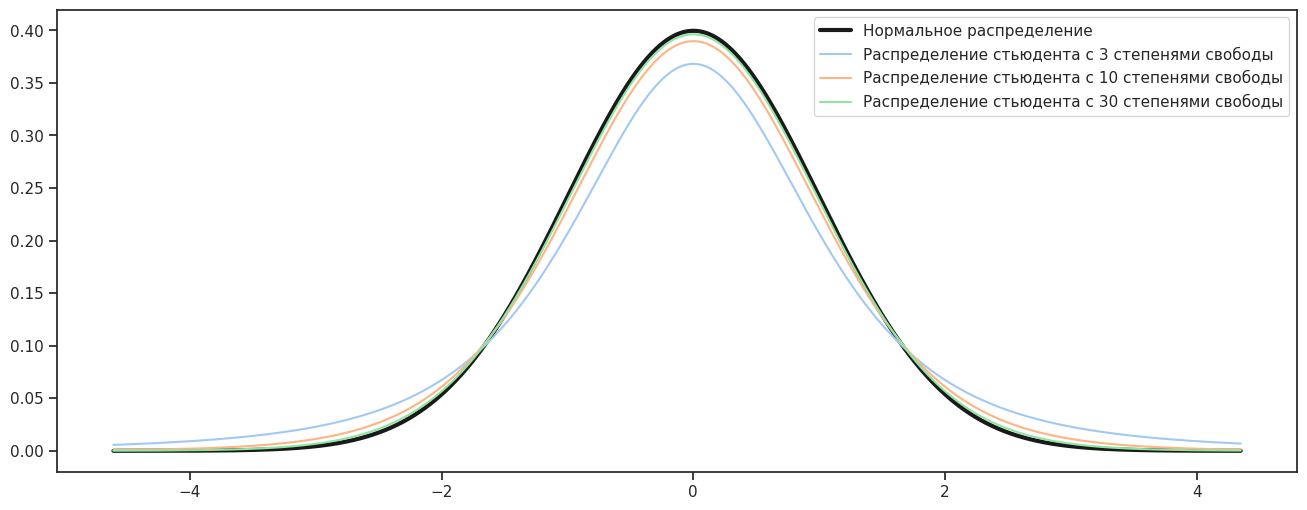

In [20]:
plt.figure(figsize=(16, 6))
plt.plot(x, norm_prob, label='Нормальное распределение', linewidth=3, color='k');
for df in (3, 10, 30):
    t_prob = st.t.pdf(x, loc=np.mean(x), scale=np.std(x), df=df)
    plt.plot(x, t_prob, label=f'Распределение стьюдента с {df} степенями свободы');
plt.legend();

# Сравнение двух средних; t-критерий Стьюдента

Предположим, мы хотим сравнить две выборки с известными средними и стандартными отклонениями, а также с известным числом наблюдений в каждой. Выдвинем нулевую гипотезу: средние действительно равны. Альтернативная гипотеза: средние не равны.

Если верна нулевая гипотеза, то если повторять эксперимент многократно, то есть много раз извлекать из ГС пары выборок, то разница между их средними распределится (нормально? t-образно?) вокруг нуля со стандартным отклонением

$$ \large SE=\sqrt[]{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}}         $$

По аналогии с z-значением, введем t-значение

$$ \large t = \frac{X_1-X_2}{\sqrt[]{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}} }           $$

Зная его, а также число степеней свободы...

$$ \large df=n_1-1 + n_2-1 = n_1+n_2-2   $$

... Мы можем узнать, насколько далеко отклонилось от предполагаемое среднего наше реальное среднее

Решим задачку (решение отличается от приведенного в [курсе](https://stepik.org/lesson/9249/step/7?unit=1829))

In [21]:
m1 = 89.9
sd1 = 11.3
n1 = 20

m2 = 80.7
sd2 = 11.7
n2 = 20

d1 = st.norm.rvs(loc=m1, scale=sd1, size=n1, random_state=123)
d2 = st.norm.rvs(loc=m2, scale=sd2, size=n2, random_state=123)

# Так как у нас конечная выборка небольшого объема, то ее параметры (среднее, стандартное отклонение) будут отличаться от заданных. Пересчитаем их

m1 = np.mean(d1)
sd1 = np.std(d1, ddof=1) # Обязательно указать число степеней свободы, так как у нас выборка, а не ГС

m2 = np.mean(d2)
sd2 = np.std(d2, ddof=1)

df = n1 + n2 - 2

# При условии неравенства дисперсий в выборках число степеней свободы считается вот так (t-критерий Уэлча)
df = (sd1**2/n1 + sd2**2/n2)**2 / ( sd1**4/n1**2/(n1-1)  + sd2**4/n2**2/(n2-1)   )
df

37.954109748322104

Найдем t-значение вручную

In [22]:
t = (m1-m2) / (sd1**2/n1+sd2**2/n2)**0.5

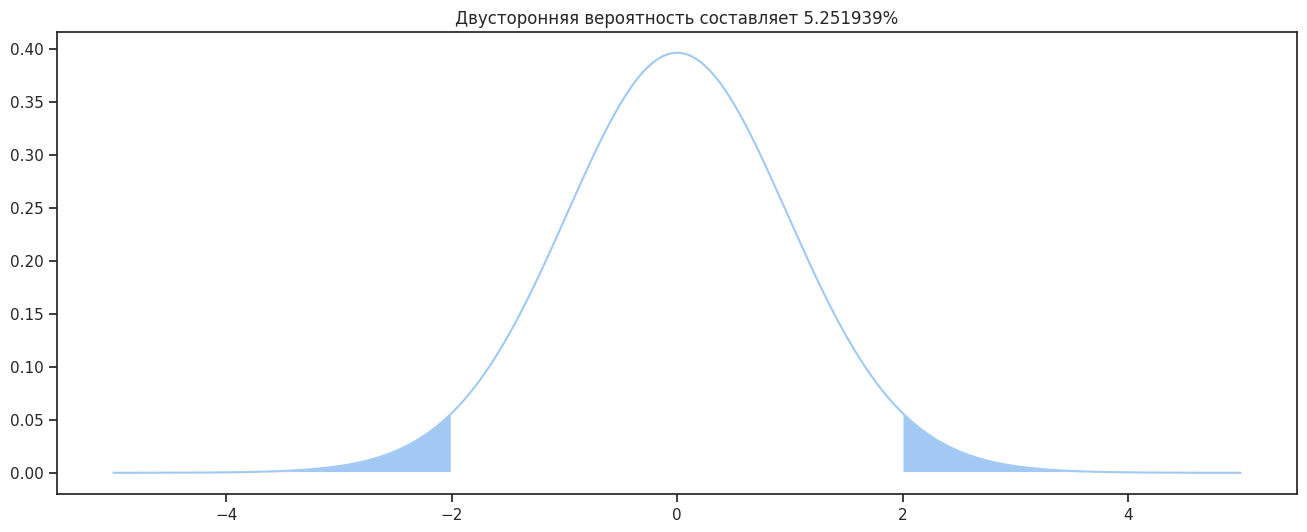

In [23]:
x = np.arange(-5, 5, 0.001)
t_prob = st.t.pdf(x, loc=0, scale=1, df=n1+n2-2)
plt.plot(x, t_prob);
plt.fill_between(x, 0, t_prob, where=np.abs(x)>t);

plt.title(f'Двусторонняя вероятность составляет {2*(1-st.t.cdf(t, df=df)):.6%}');

In [24]:
print(f'\tРасчет вручную: \nt-значение: {t} \nчисло степеней свободы: {df} \npvalue: {2*(1-st.t.cdf(t, df=df))}')

	Расчет вручную: 
t-значение: 2.001551634309586 
число степеней свободы: 37.954109748322104 
pvalue: 0.05251939059183086


In [25]:
t = st.ttest_ind(d1, d2, equal_var=False).statistic
pvalue = st.ttest_ind(d1, d2, equal_var=False).pvalue
df = st.ttest_ind(d1, d2, equal_var=False).df

In [26]:
print(f'\tРасчет в scipy: \nt-значение: {t} \nчисло степеней свободы: {df} \npvalue: {pvalue}')

	Расчет в scipy: 
t-значение: 2.001551634309586 
число степеней свободы: 37.9541097483221 
pvalue: 0.05251939059183091


***Выводы:*** 
* Помогло вот это [объяснение](https://stackoverflow.com/questions/66081234/stats-ttest-ind-vs-manual-computation-of-students-independent-t-test-diff)
* В общем случае лучше сразу использовать t-критерий Уэлча (он по умолчанию встроен в ttest_ind), так как обычный t-критерий имеет требование гомогенности дисперсий (то есть равенства ее в выборках)
* Кстати, проверить гомогенность дисперсии помогут критерии Левена и Фишера
* Для выборок всегда нужно указывать число степеней свободы
* scipy.stats.ttest_ind по умолчанию считает двустороннюю вероятность
* ~Карпов гонза~
* В некоторых источниках встречается требование к нормальности данных для применения t-теста. Все как-то мутно, но скорее всего речь о ЦПТ, то есть о том, что извлекаемые выборки должны следовать ЦПТ. Если выборочные средние по какой-то причине не образуют нормальное распределение, то тут либо выборки не независимые, либо что-то еще.
UPD. формулировку "ненормальное распределение" часто применяют по отношению к наличию выбросов.
* Критерий Стьюдента неустойчив к выбросам, так как опирается на среднее значение выборки. Решить эту проблему можно, используя непараметрические тесты (не использующие значения из распределения, его среднее, стандартное отклонение и тд)
* Вот [еще](https://koch-kir.medium.com/%D0%B8%D1%81%D1%82%D0%BE%D1%80%D0%B8%D1%8F-%D0%BE%D0%B4%D0%BD%D0%BE%D0%B3%D0%BE-%D0%BE%D0%B1%D0%BC%D0%B0%D0%BD%D0%B0-%D0%B8%D0%BB%D0%B8-%D1%82%D1%80%D0%B5%D0%B1%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F-%D0%BA-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8E-%D0%B2-%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85-%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%85-55139a5558d) полезная статья

# Сравнение параметрического и непараметрического критериев

Создадим два заведомо разных распределения, построим по ним боксплоты и вычислим критерии Стьюдента и Манна-Уитни. Затем добавим к каждой выборке по выбросу и вычислим те же критерии.

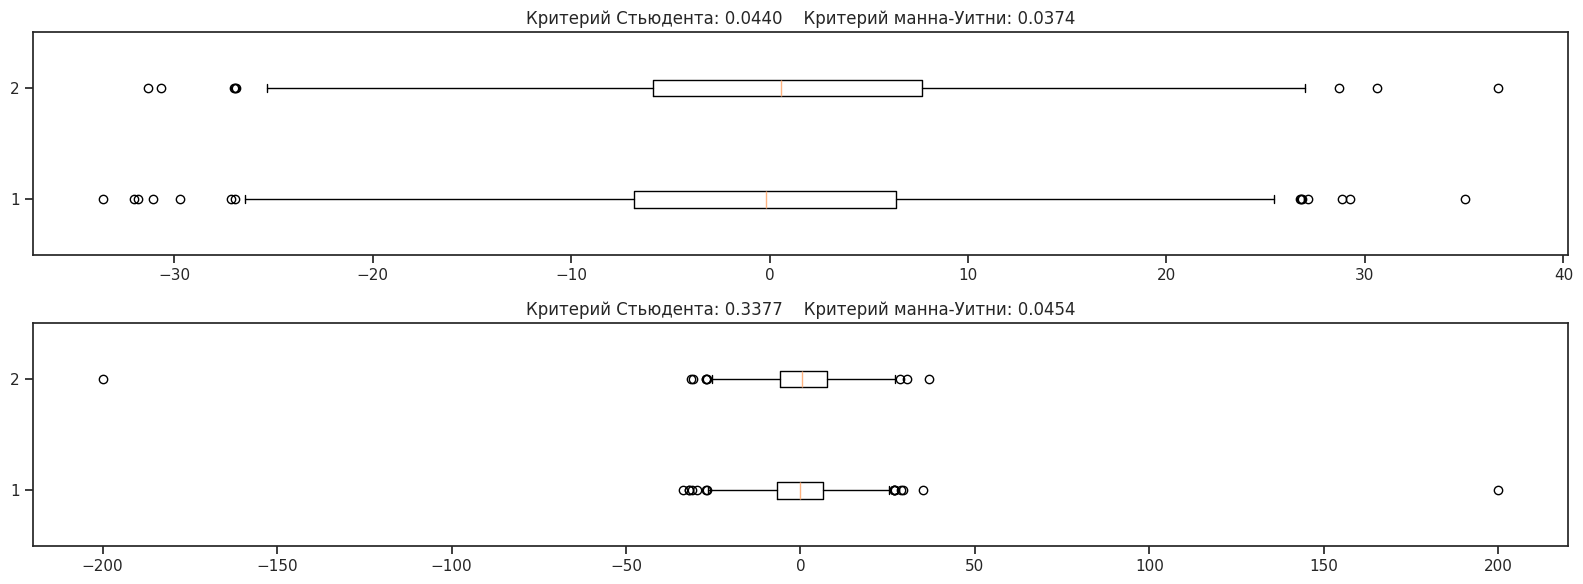

In [27]:
d1 = st.norm.rvs(loc=0, scale=10, size=1000, random_state=231)
d2 = st.norm.rvs(loc=1, scale=10, size=1000, random_state=123)

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.boxplot([d1, d2], vert=False);
ax1.set_title(f'Критерий Стьюдента: {st.ttest_ind(d1, d2, equal_var=False).pvalue:.4f} \
   Критерий манна-Уитни: {st.mannwhitneyu(d1, d2).pvalue:.4f}')

d1 = np.append(d1, [200])
d2 = np.append(d2, [-200])

ax2.boxplot([d1, d2], vert=False);
ax2.set_title(f'Критерий Стьюдента: {st.ttest_ind(d1, d2, equal_var=False).pvalue:.4f} \
   Критерий манна-Уитни: {st.mannwhitneyu(d1, d2).pvalue:.4f}')

plt.tight_layout()

Мы видим, что оба критерия показывают статистически значимое различие между выборками. Однако, когда мы добавляем выбросы, приближающие средние выборок друг к другу, критерий Стьюдента перестает показывать статистически значимое различие. Непараметрический критерий Манна-Уитни более робастен.

# Проверка распределения на нормальность, QQ-Plot

В некоторых критериях есть требование к нормальности. Существуют критерии, позволяющие оценить, насколько распределение отличается от нормального

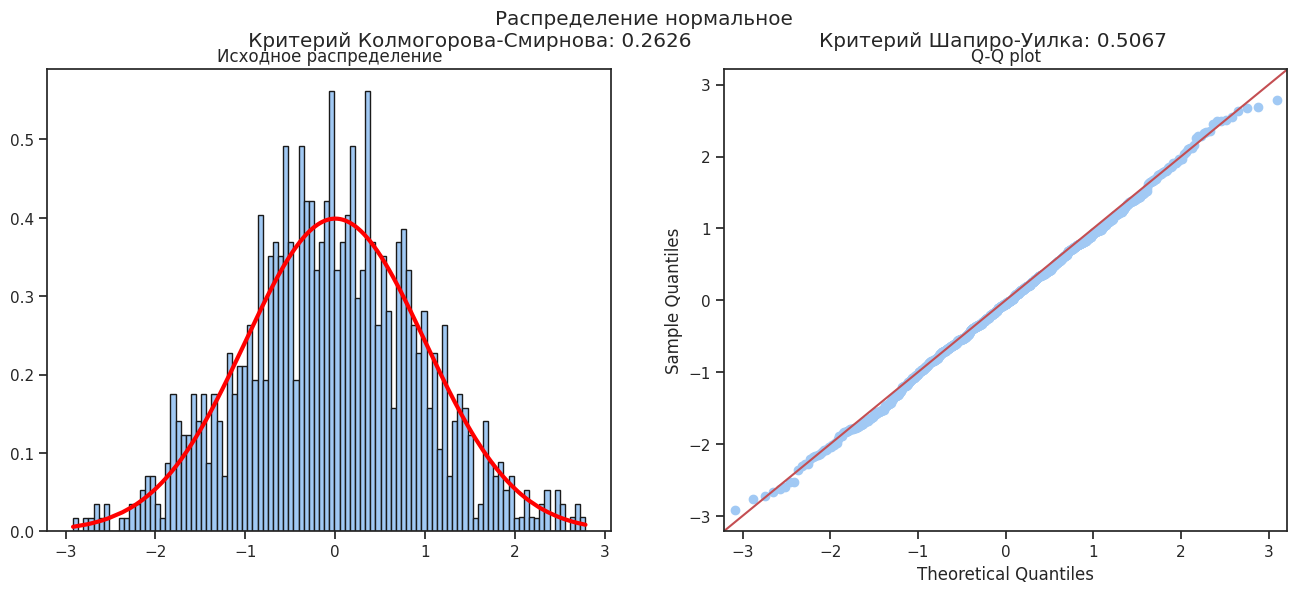

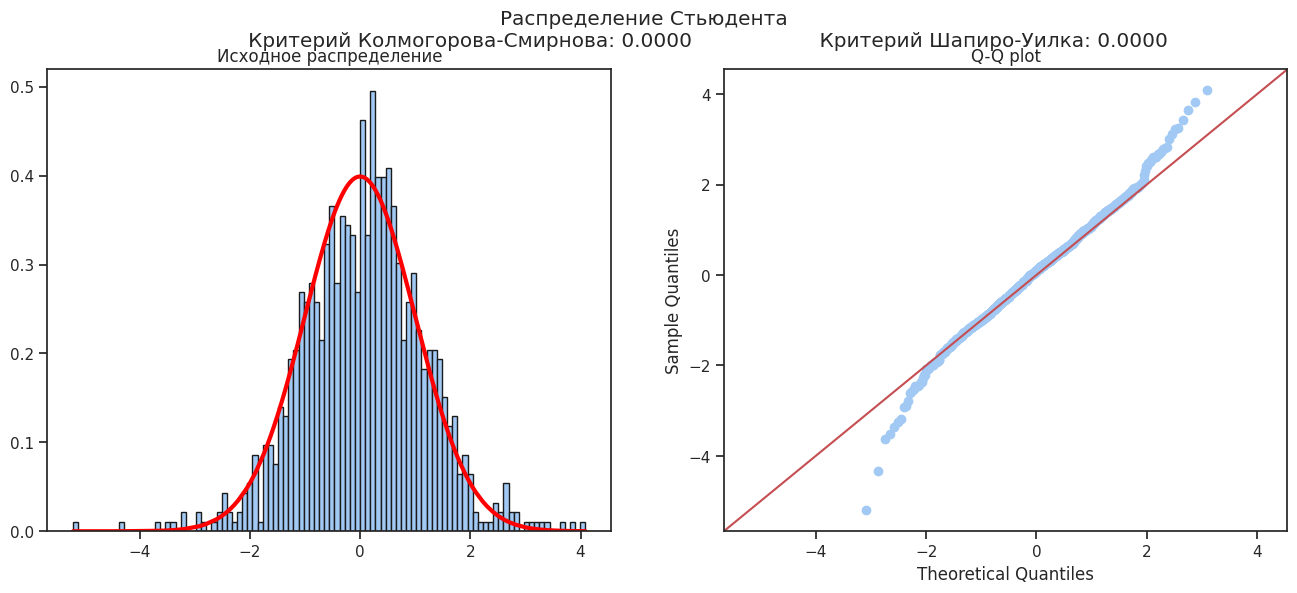

In [28]:
mu=0
sigma=1
norms = np.random.normal(loc=mu, scale=sigma, size=1000)
ts = np.random.standard_t(size=1000, df=10)

for dist, dist_name in zip((norms, ts), ('нормальное', 'Стьюдента')):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Расчет еритерия Колмогорова-Смирнова
    if dist_name == 'нормальное':
        ks_pvalue = st.kstest(rvs=dist, cdf=st.norm.cdf).pvalue
    else:
        ks_pvalue = st.kstest(rvs=dist, cdf=st.t.cdf(dist, len(dist)-1)).pvalue
        
    # Расчет критерия Шапиро-Уилка
    sw_pvalue = st.shapiro(dist).pvalue
    
    fig.suptitle(f'Распределение {dist_name} \n\
                   Критерий Колмогорова-Смирнова: {ks_pvalue:.4f} \
                   Критерий Шапиро-Уилка: {sw_pvalue:.4f}')

    ax1.hist(dist, bins=100, density=True, ec='k');
    ax1.grid(False)
    ax1.plot(sorted(dist), st.norm.pdf(sorted(dist), loc=mu, scale=sigma), color='red', linewidth=3, );
    ax1.set_title('Исходное распределение');

    sm.qqplot(dist, line='45', ax=ax2);
    ax2.set_title('Q-Q plot');

**Выводы:** 
* Существует два способа визуальных способа оценки нормальности распределения. 
* Первый - по имеющимся среднему и стандартному отклонению распределения построить график плотности нормального распределения и сравнить его с гистограммой. Если график плотности проходит гладко по вершинам "баров" гистограммы, значит, распределение нормальное
* Второй - построить график квантиль-квантиль (ку-ку плот). Нам нем значенияЖ взятые из нормального распределения ложатся на диагональную прямую. То есть чем сильнее значения отклоняются от диагонали, тем дальше распределение от нормального.
* Визуальные способы подходят тогда, когда данных немного и когда нет необходимости вычислить некоторую численную оценку нормальности. В остальных случаях используют критерии Шапиро-Уилка (для числа наблюдений меньше 5000) и Колмогорова-Смирнова. В этих критериях pvalue<0.05 означает, что распределение скорее всего ненормальное

# Однофакторный дисперсионный анализ ANOVA

Очень часто в экспериментах и исследованиях возникает необходимость сравнить уже не две, а несколько групп между собой. В таком случае мы можем применять однофакторный дисперсионный анализ. Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется независимой переменной. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется зависимая переменная.

Создадим 3 группы по 3 наблюдения и попытаемся сравнить их между собой

| Группа А | Группа В | Группа С |
|:--------:|:--------:|:--------:|
|    3     |    5     |    7     |
|    1     |    3     |    6     |   
|    2     |    4     |    5     |

Выдвинем нулевую гипотезу Н<sup>0</sup>:  μ<sup>1</sup> = μ<sup>2</sup> = μ<sup>3</sup> (средние групп равны)
Тогда альтернативная гипотеза Н<sup>1</sup>:  хотя бы пара средних не равны между собой

Найдем среднее всех выборок

In [29]:
X = (3+1+2+5+3+4+7+6+5) / 9
X

4.0

Введем понятие SST (total sum of squares). Этот показатель оценивает изменчивость показателя без разделения на группы

In [30]:
SST = (3-4)**2 + (1-4)**2 + (2-4)**2 + (5-4)**2 + (3-4)**2 + (4-4)**2 + (7-4)**2 + (6-4)**2 + (5-4)**2
SST

30

Число степеней свободы в данном случае равно числу наблюдений - 1

In [31]:
df = 9-1
df

8

Изменчивость данных может быть обусловлена двумя причинами: внутригрупповой (SSW) и межгрупповой изменчивостью (SSB)

SSW считается как сумма квадратов отклонений от среднего для элементов внутри каждой группы

In [32]:
x1 = (3+1+2) / 3
x2 = (5+3+4) / 3
x3 = (7+6+5) / 3

In [33]:
ssw1 = (3-x1)**2 + (1-x1)**2 + (2-x1)**2
ssw2 = (5-x2)**2 + (3-x2)**2 + (4-x2)**2
ssw3 = (7-x3)**2 + (6-x3)**2 + (5-x3)**2
ssw = ssw1 + ssw2 + ssw3
ssw

6.0

Посчитаем число степеней свободы для внутригрупповой суммы квадратов. Оно равно числу наблюдений минус количество групп

In [34]:
df_ssw = 9 - 3

Межгрупповая сумма квадратов считается как отклонение групповых средних от общего среднего

In [35]:
ssb = 3*(2-4)**2 + 3*(4-4)**2 + 3*(6-4)**2
ssb

24

In [36]:
# число групп минус 1
df_ssb = 3 - 1

Итак, наша общая изменчивость разделилась в пропорции 24/6 между межгрупповой и внутригрупповой изменчивостью. ТО есть большая часть обеспечивается межгрупповой изменчивостью. То есть группы сильно отличаются между собой.

Отсюда можно посчитать характерный статистический показатель, который называется F-значение 

In [37]:
f_value = (ssb/df_ssb) / (ssw/df_ssw)
f_value

12.0

Сведем задачу к статистичесому тесту. Будем многократно извлекать 3 выборки по 3 значения, предполагая, что средние этих выборок равны (нулевая гипотеза). Тогда скорее всего должно получиться так, что средние между собой отклоняются незначительно, и вся изменчивость обуславливается внутригрупповой изменчивостью, то есть F-значение стремится к нулю

In [38]:
x = np.arange(-1, 25, 0.001)
f_dist = st.f.pdf(x, dfn=2, dfd=6)

Используем логарифмический масштаб, чтобы точно увидеть заштрихованную область

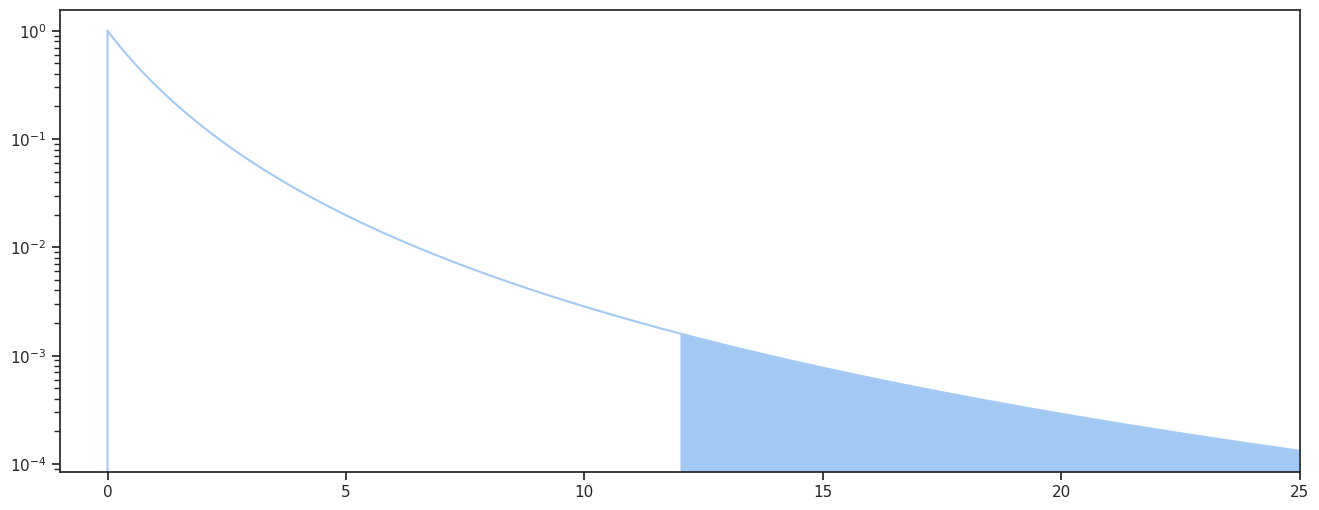

In [39]:
plt.plot(x, f_dist);
plt.xlim([-1, 25]);
plt.yscale('log')

plt.fill_between(x, 0, f_dist, where=x>f_value);

Посчитаем p-value, то есть вероятность того, что средние выборок равны

In [40]:
p_value = 1 - st.f.cdf(f_value, dfn=df_ssb, dfd=df_ssw)
p_value

0.008000000000000007

Низкое значение p-value говорит нам о том, что как минимум два средних из рассматриваемых выборок значимо отличаются друг от друга. Того же результата можно добиться при помощи встроенного теста One-way ANOVA

In [41]:
st.f_oneway([1,2,3], [3,4,5], [5,6,7])

F_onewayResult(statistic=12.0, pvalue=0.008000000000000002)

Посмотрим, какой будет результат для сравнения двух выборок, которую мы уже решали через критерий Стьюдента.

In [42]:
st.f_oneway([1,2,3], [3,4,5])

F_onewayResult(statistic=6.0, pvalue=0.07048399691021996)

In [43]:
st.ttest_ind([1,2,3], [3,4,5], equal_var=False)

TtestResult(statistic=-2.449489742783178, pvalue=0.07048399691021993, df=4.0)

P-value совпал!

**Выводы:**
* Дисперсионный анализ является расширением методов сравнения выборочных средних до нескольких выборок
* Для того чтобы ответить на вопрос, какие конкретно группы значимо отличаются между собой, нельзя сравнить группы попарно между собой


# Множественные сравнения в ANOVA

Проблема сравнений нескольких выборок заключается в том, что с ростом числа сравниваемых групп растет вероятность того, что между хотя бы одной парой из множества выборок обнаружатся статистически значимые различия, хотя на самом деле их нет. Чтобы избежать такого негативного эффекта, вводят поправки на множественное сравнение.

## Поправка Бонферрони

Во время проведения всех статистических тестов мы фактически сравниваем получившиййся показатель p-value с допустимой вероятностью ошибки первого рода альфа. Но так как при множественном сравнении растет вероятность обнаружить ложное различие, необходимо корректировать уровень альфа. Поправка Бонферрони предлагает уменьшать альфа пропорционально числу попарных сравнений n*(n-1)/2. То есть если при сравнении 2 групп мы принимали альфа=0.05, то при сравнении трех групп должны взять уже альфа=0.05/[3*(3-1)/2].

Поправка Бонферрони является очень консервативной, то есть она настолько снижает порог отклонения нулевой гипотезы, что получить статистически значимые различия становится очень сложно. В реальной практике число сравнений велико, поэтому поправку Бонферрони используют редко


## Поправка Тьюки

Критерий Тьюки похож на Критерий Стьюдента, он строит доверительный интервал разниц между средними значениями. Если доверительный интервал не включает в себя ноль, значит между этой парой имеются значимые различия

***Выводы***
1) Получить статистически значимые различия, не использую множественную поправку, легко. Но это читерство
2) С другой стороны, можно начать с самой простой поправки Бонферрони, и если уж с ней подтвердятся статистически значимые различия, то эксперименту точно можно верить
3) Компромиссом является использование более либеральных поправок
4) Хорошим тоном является проверка именно тех гипотез, которые были сформулированы в начале эксперимента, и с осторожностью относиться к инсайтам, обнаруженным неожиданно
5) Для всех сформулированных выводов нужно попытаться найти объяснение и повторить эксперимент, направленный уже именно на подтверждение значимых различий

# Многофакторный ANOVA


Номинативная переменная необязательно должна быть одна. Приведем в качестве примера экспериментальнфе данные о зависимости риска развития атеросклероза от факторов возраста и дозировки лекарства

In [167]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv')
df['age'] = df['age'].replace({1: 'молодые', 2: 'пожилые'})
df['dose'] = df['dose'].replace({'D2': 'низкая', 'D1': 'высокая'})
df.sample(3)

,expr,age,dose
26,103.9476,пожилые,высокая
60,105.2395,пожилые,низкая
48,101.4421,пожилые,низкая


In [168]:
res = df.groupby(['age', 'dose']).agg(count=('expr', 'count'), 
                                mean=('expr', 'mean'), 
                                std=('expr', 'std'), 
                                conf=('expr', lambda x: st.norm.interval(0.95, 
                                                               loc=np.mean(x), 
                                                               scale=np.std(x)/np.sqrt(len(x))))).reset_index()
res

,age,dose,count,mean,std,conf
0,молодые,высокая,16,104.7585,5.8635,"(101.97665560869844, 107.5402725444376)"
1,молодые,низкая,16,105.5459,4.3690,"(103.47306057194766, 107.61866803707255)"
2,пожилые,высокая,16,101.0048,5.1163,"(98.57746483768642, 103.43214489499735)"
3,пожилые,низкая,16,102.2736,5.1354,"(99.83724471583976, 104.7100140248864)"


В случае многофакторного дисперсионного анализа общая изменчивость будет складывать из нескольких слагаемых: Внутригрупповой изменчивостью, межгрупповой изменчивостью по фактору А, межгрупповой изменчивостью по фактору В, а также их взаимодействием

$$ \large SS_{total} = SS_W + SSB_A + SSB_B + SSB_A*SSB_B         $$

In [169]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Определение модели
model = ols('expr ~ age + dose', data=df).fit()

# Проведение двухфакторного дисперсионного анализа
anova_table = sm.stats.anova_lm(model)

print(anova_table)

              df    sum_sq  mean_sq      F  PR(>F)
age       1.0000  197.4528 197.4528 7.5696  0.0078
dose      1.0000   16.9122  16.9122 0.6484  0.4238
Residual 61.0000 1591.1845  26.0850    NaN     NaN


В данном случае значимым оказлось только влияние возраста, а для дозировки и взаимодействия признаков p-value (столбец PR(>F) оказался выше 0.05. Визуально это выглядит вот так: Средние по концентрациям входят в доверительные интервалы друг друга, а средние по возрасту не входят

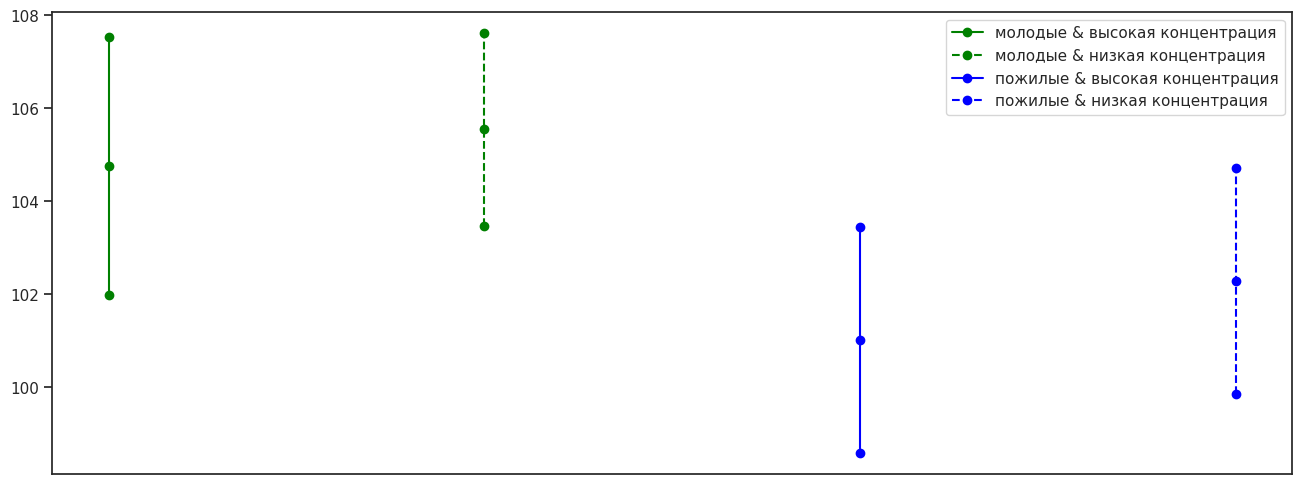

In [143]:
for i, line in res.iterrows():
    
    color='blue'
    if line['age']=='молодые':
        color='green'
    linestyle='--'
    
    if line['dose'] == 'высокая':
        linestyle='-'
        
    plt.plot((i, i), line['conf'], 'o', linestyle=linestyle, color=color, label=f'{line["age"]} & {line["dose"]} концентрация')
    plt.plot(i, line['mean'], 'o', color=color)
    plt.legend()
    plt.xticks([])

## Взаимодействие факторов

Может оказаться так, что в зависимости от одной номинативной переменной вторая может влиять на зависимую переменную кардинальном иным способом

In [159]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/9250/birds.csv')
df['hormone'] = df['hormone'].replace({0: 'нет', 1: 'да'})
df['sex'] = df['sex'].replace({0: 'женский', 1: 'мужской'})
df.sample(3)

,var4,hormone,sex
9,18.3138,да,мужской
23,19.2973,нет,мужской
56,22.5302,нет,женский


In [160]:
res = df.groupby(['hormone', 'sex']).agg(count=('var4', 'count'), 
                                mean=('var4', 'mean'), 
                                std=('var4', 'std'), 
                                conf=('var4', lambda x: st.norm.interval(0.95, 
                                                               loc=np.mean(x), 
                                                               scale=np.std(x)/np.sqrt(len(x))))).reset_index()
res

,hormone,sex,count,mean,std,conf
0,да,женский,16,17.2923,2.8644,"(15.933278375334945, 18.651229041679017)"
1,да,мужской,16,19.7437,3.3836,"(18.13838687384479, 21.348937012443105)"
2,нет,женский,16,19.8873,3.6772,"(18.142704871721723, 21.63187653359871)"
3,нет,мужской,16,17.6089,2.4498,"(16.446675582784295, 18.771156534049666)"


In [162]:
# Определение модели
model = ols('var4 ~ hormone + sex + hormone:sex', data=df).fit()

# Проведение двухфакторного дисперсионного анализа
anova_table = sm.stats.anova_lm(model)

print(anova_table)

                 df   sum_sq  mean_sq      F  PR(>F)
hormone      1.0000   0.8475   0.8475 0.0865  0.7697
sex          1.0000   0.1198   0.1198 0.0122  0.9123
hormone:sex  1.0000  89.4834  89.4834 9.1364  0.0037
Residual    60.0000 587.6504   9.7942    NaN     NaN


Здесь видно, что ни фактор hormone, ни фактор sex не имеют значимого влияния на зависимую переменную, однако влияние имеет их взаимодействие. Выглядит это следующим образом:

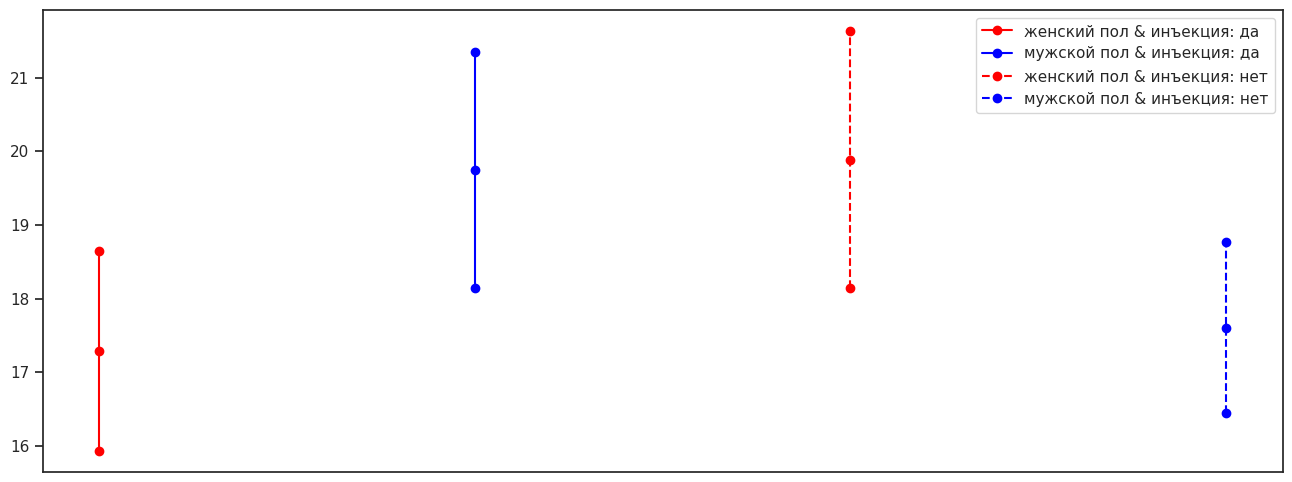

In [165]:
for i, line in res.iterrows():
    
    color='blue'
    if line['sex']=='женский':
        color='red'
        
    linestyle='--'
    if line['hormone'] == 'да':
        linestyle='-'
        
    plt.plot((i, i), line['conf'], 'o', linestyle=linestyle, color=color, label=f'{line["sex"]} пол & инъекция: {line["hormone"]}')
    plt.plot(i, line['mean'], 'o', color=color)
    plt.legend()
    plt.xticks([])

Получается, что факт наличия инъекции по-разному повлиял на целевую переменную для представителей разного пола. Если бы мы не попытались исследовать взаимодействие признаков, то они бы смешались, и значимое разлчиие установить бы не удалось. 

В принципе можно увеличить число исследуемых факторов, однако при их количестве больше 2-3 наглядно показать разницу будет уже затруднительно

## Требования к данным

Анова выдвигает ряд требований к данным: 
* Нормальность распределения (опять же скорее всего имеется в виду, что в данных не должно быть откровенных выбросов, так как ANOVA опирается на среднее)
* Гомогенность (равенство между выборками) дисперсии  (критерий Левена)

Хорошая новость в том, что при большом количестве данных (больше 50), этими требованиями можно в разумных пределах пренебречь

